# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
import scipy.integrate as integrate
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Directories

In [2]:
# Data files (for fig.4d)
import_folder = 'sec4_2D_4'
export_folder = 'export'
ex_name = 'sec4_ND_num'

# Directory
dir_main = os.getcwd()
dir_im = os.path.join(dir_main, 'matlab', 'data', import_folder)
dir_ex = os.path.join(dir_main, 'matlab', 'data', export_folder)

# Parameters and settings

In [3]:
# Parameters
g = 1.5
omega0 = w0 = 1.0
gain = 50
tau0 = 0.1

# Upper bound for delta
delta_U = 1.0
delta_steps = 100

# Gaussian integral limit
gauss_U = 2*pi
gauss_steps = 1000

# Find synchronous states for each delta

In [4]:
delta_arr = np.linspace(0, delta_U, num=delta_steps)

# Parameter dictionary
param = {'g': g,
         'omega0': omega0,
         'gain': gain,
         'tau0': tau0
         }

Omega_arr = np.zeros(delta_arr.size+1)
Omega_arr[0] = w0

# Fixed-point function
Omega_fun = lambda Omega, delta2: funlib.Omega_infty(Omega, delta2, param, L=gauss_U, steps=gauss_steps) - Omega


for k in range(delta_arr.size):
    deltak = delta_arr[k]
    Omega_funk = lambda Omega: Omega_fun(Omega, deltak**2)
    new_root = rootlib.find_root(Omega_funk, Omega_arr[k], w0-g, w0+g, steps=100)
    if new_root[1]:
        Omega_arr[k+1] = new_root[0]

Omega_arr = Omega_arr[1:]

## Plot synchronous states

(0, 1.3)

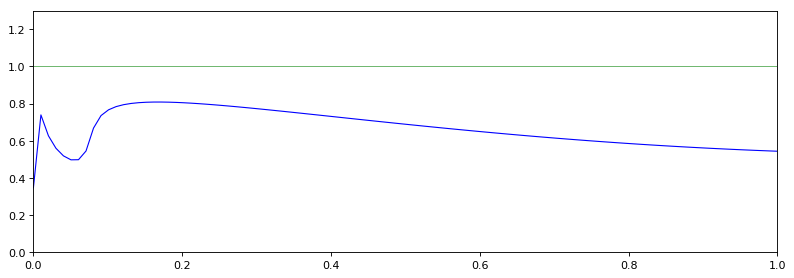

In [5]:
# Figure
fig, ax = plt.subplots(1, figsize=(12, 4), dpi=80)
ax.plot(delta_arr, Omega_arr, color='blue', linewidth=1.0, zorder=1)
ax.axhline(y=w0, color='green', linewidth=0.5, zorder=-1)

ax.set_xlim(left=0, right=delta_U)
ax.set_ylim(bottom=0, top=w0 + g/5)

# Theoretical bounds

In [6]:
delta1 = 0.2

# Positive bound curve (half-unit circle)
t = np.linspace(-pi/2, pi/2, num=1000)
pos_curve = 2*g*np.exp(1j*t)

# Negative eigenvalues (challenging)
u_arr = np.linspace(-1, 0, num=1000, endpoint=True)

v_arr2 = (g*np.exp(np.abs(u_arr)*tau0)*np.exp(delta1**2*u_arr**2*gain**2/2)+g)**2 - u_arr**2
v_arr_pos = np.sqrt(v_arr2)
v_arr_neg = -np.sqrt(v_arr2)

## Plot bounds

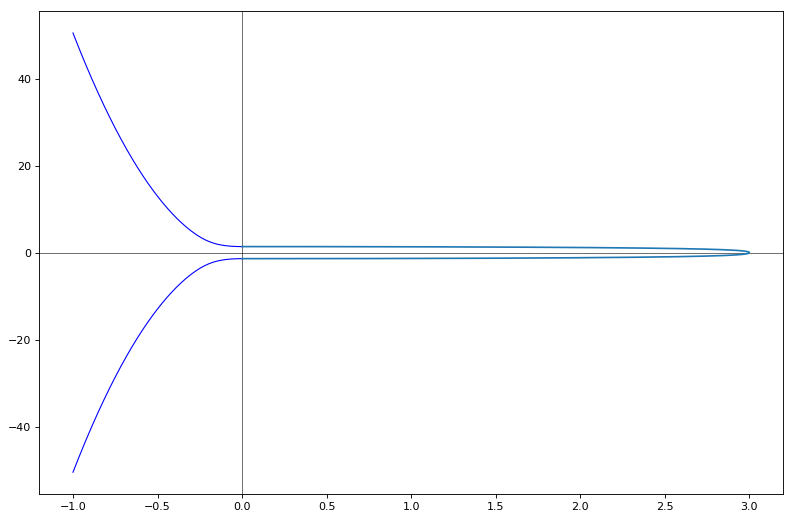

In [7]:
# Define s.log
slog = lambda x: np.sign(x)*np.log(1 + np.abs(x))

fig, ax = plt.subplots(1, figsize=(12, 8), dpi=80)
ax.plot(u_arr, slog(v_arr_pos), color='blue', linewidth=1.0, zorder=1)
ax.plot(u_arr, slog(v_arr_neg), color='blue', linewidth=1.0, zorder=1)
ax.plot(pos_curve.real, slog(pos_curve.imag))

ax.axhline(y=0, color='black', linewidth=0.5, zorder=-1)
ax.axvline(x=0, color='black', linewidth=0.5, zorder=-1)

# Polynomials

In [8]:
ind1 = np.argmin(np.abs(delta_arr - delta1))
delta1 = delta_arr[ind1]
Omega1 = Omega_arr[ind1]
z0 = -1 + 2j

# Integral function
gauss_fun = funlib.eigN_density_fun(Omega1, delta1**2, param)

# Sample integral
gauss_fun0 = lambda x: gauss_fun(x, z0)

## Preview plot

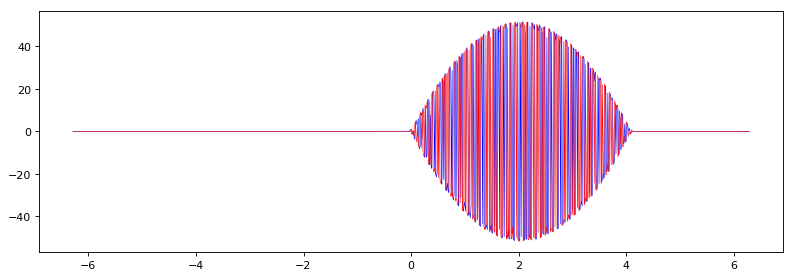

In [9]:
x_arr = np.linspace(-2*pi, 2*pi, num=1000)
y_arr = gauss_fun0(x_arr)

fig, ax = plt.subplots(1, figsize=(12, 4), dpi=80)

ax.plot(x_arr, slog(y_arr.real), color='blue', linewidth=0.5, zorder=1)
ax.plot(x_arr, slog(y_arr.imag), color='red', linewidth=0.5, zorder=2)

## Power term

(-0.004650304909924666, None)
(5.836741661122683e-06, 1.0234534527725474e-10)


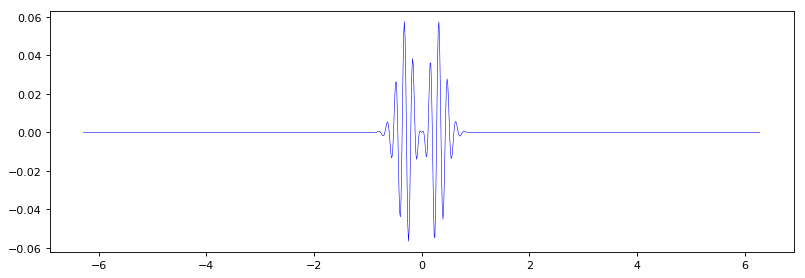

In [17]:
# Integral function

# Sample integral
gauss_fun_m = funlib.eigN_pow_fun(Omega1, delta1**2, param, 2)

# Integrate
I_m = integrate.fixed_quad(gauss_fun_m, 0, pi/2)
I_m2 = integrate.quad(gauss_fun_m, 0, pi/2)

print(I_m)
print(I_m2) # Compare with matlab

ym_arr = gauss_fun_m(x_arr)
fig, ax = plt.subplots(1, figsize=(12, 4), dpi=80)
ax.plot(x_arr, ym_arr, color='blue', linewidth=0.5, zorder=1)

In [18]:
Omega1

0.8042548899238956